# 1 Import Relevent Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression



### To Remove Warnings

In [2]:
import warnings
warnings.simplefilter("ignore")

## 1. Loading Raw Dataset 

In [3]:
# "/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv"
raw_data = pd.read_csv("data/laptopData.csv", encoding="utf-8")

raw_data.head(6)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000


### Features of the Dataset

- **Company: the manufacturer of the laptop**
- **TypeName: the type or category of the laptop**
- **Inches: the size of the laptop's screen in inches**
- **ScreenResolution: the resolution of the laptop's display screen**
- **Cpu: the central processing unit (CPU) used in the laptop**
- **Ram: the amount of RAM (in gigabytes) available on the laptop**
- **Memory: the storage capacity of the laptop**
- **Gpu: the graphics processing unit (GPU) in the laptop**
- **OpSys: the operating system running on the laptop**
- **Weight: the weight of the laptop in kilograms or pounds**
- **Price (INR): the retail price of the laptop in Indian Rupees**

## 2. Preprocessing

### Exploring Column Values

In [4]:
#print columns name
print (f"Total Number of Columns: {len(list(raw_data.columns))}")
print (*raw_data.columns, sep= '\n')

Total Number of Columns: 12
Unnamed: 0
Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price


## Get the information of the Dataset

In [5]:
def Basic_information_about_dataset(dataset:pd.DataFrame):
    print ("===================Columns Names=======================")
    print ("\n".join(dataset.columns.values))
    print ("\n")
    print ("===================Data Info===========================")
    print(dataset.info())
    print("\n")

    print("=====================Check Null Values==================")
    print(dataset.isnull().sum())
    print("\n")


    print ("=====================Dataset Describe==================")
    print(dataset.describe(include='object'))
    print(dataset.describe())
                
    
Basic_information_about_dataset(raw_data)





===================Columns Names=======================
Unnamed: 0
Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price


===================Data Info===========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)


### Summary of the Dataset 
* There is total 1303 entries
* There are total 11 columns 
* Dependent variable is the price of the column


### Untidy Data (Structural Problem)
- scrrenresolution : more column can be made from this column
- cpu : more columns can be made from this column.
- memory: some columns have both the values for ssd and hdd. - split into two columns.
- gpu: name can be extracted separately.

### Check Nan and drop the Nan Values 

In [6]:
#check the null value
raw_data.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
# Print the null rows
null_rows = raw_data[raw_data["Company"].isnull()]
print (null_rows.shape)

(30, 12)


In [8]:
#drop the unnamed column
raw_data.drop("Unnamed: 0", axis=1, inplace=True)

print ("\n".join(raw_data.columns))

Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price


In [9]:
#drop the rows that has null values
raw_data.dropna(inplace= True)
raw_data.shape


(1273, 11)

### Make Columns from ScreenResolution -> Panel_Type_IPS, Diplay_Type, Resolution


In [10]:
print(f"Null values in ScreenResolution: {raw_data["ScreenResolution"].isnull().sum()}")
pd.DataFrame(raw_data["ScreenResolution"].value_counts())

Null values in ScreenResolution: 0


,count
ScreenResolution,
Full HD 1920x1080,495
1366x768,274
IPS Panel Full HD 1920x1080,226
IPS Panel Full HD / Touchscreen 1920x1080,52
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [11]:
import re

def parse_screen_resolution(res_str):
    # Initialize with default values
    panel_type_IPS = None
    display_type = None
    is_touchscreen = False
    resolution = None
    resolution_width = None
    resolution_height = None
    
    # Extract resolution (always the last part)
    resolution_match = re.search(r'(\d+x\d+)$', res_str)
    if resolution_match:
        resolution = resolution_match.group(1)
        # Split resolution into width and height
        try:
            resolution_width, resolution_height = map(int, resolution.split('x'))
        except:
            resolution_width, resolution_height = None, None
    
    # Remove resolution from string to parse the rest
    remaining_str = re.sub(r'\s*\d+x\d+$', '', res_str).strip()
    
    # Check for touchscreen
    if '/ Touchscreen' in remaining_str:
        is_touchscreen = 1
        remaining_str = remaining_str.replace('/ Touchscreen', '').strip()
    elif 'Touchscreen' in remaining_str:
        is_touchscreen = 1
        remaining_str = remaining_str.replace('Touchscreen', '').strip()

    else:
        is_touchscreen = 0
    
    # Check for panel type (IPS Panel)
    if 'IPS Panel' in remaining_str:
        panel_type_IPS = 1
        remaining_str = remaining_str.replace('IPS Panel', '').strip()
    else:
        panel_type_IPS = 0
        remaining_str = remaining_str.replace('IPS Panel', '').strip()

    
    # The remaining part is the display type
    if remaining_str:
        display_type = remaining_str.strip()
    
    return pd.Series({
        'panel_type_IPS': panel_type_IPS,
        'DisplayType': display_type,
        'IsTouchscreen': is_touchscreen,
        'Resolution_Width': resolution_width,
        'Resolution_Height': resolution_height,
    })


In [12]:
raw_data_copy = raw_data.copy()

In [13]:
# Apply the parsing function
raw_data_copy[['panel_type_IPS', 'DisplayType', 'IsTouchscreen', 'Resolution_Width', 'Resolution_Height']] = raw_data_copy['ScreenResolution'].apply(parse_screen_resolution)
raw_data_copy

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.0,Retina Display,0.0,2560.0,1600.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0.0,NaN,0.0,1440.0,900.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0.0,Full HD,0.0,1920.0,1080.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.0,Retina Display,0.0,2880.0,1800.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.0,Retina Display,0.0,2560.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1.0,Full HD,1.0,1920.0,1080.0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1.0,Quad HD+,1.0,3200.0,1800.0
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0.0,NaN,0.0,1366.0,768.0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0.0,NaN,0.0,1366.0,768.0


### Columns make from CPU-> CPU_Brand, CPU_Series, CPU_Model/Gen, CPU_Speed


In [14]:
print (f"Null values in CPU information: {raw_data["Cpu"].isnull().sum()}")
pd.DataFrame(raw_data["Cpu"].value_counts())

Null values in CPU information: 0


,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,128
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [15]:
raw_data_copy_cpu=raw_data_copy.copy()
raw_data_copy_cpu["Cpu"]

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1273, dtype: object

```
def parse_cpu_(cpu_str):
    # Initialize results
    cpu_brand = None
    cpu_series_model_gen_type = None
    cpu_speed = None
    
    # Extract speed (last part)
    speed_match = re.search(r'(\d+\.?\d*GHz)$', cpu_str, re.IGNORECASE)
    if speed_match:
        cpu_speed = speed_match.group(1)
        cpu_str = cpu_str[:speed_match.start()].strip()
    
    # Extract brand (first word)
    brand_match = re.match(r'(Intel|AMD|Samsung)', cpu_str, re.IGNORECASE)
    if brand_match:
        cpu_brand = brand_match.group(1).title()
        cpu_str = cpu_str[brand_match.end():].strip()
    
    # The rest goes into series/model/gen/type
    cpu_series_model_gen_type = cpu_str.strip() if cpu_str else None
    
    return pd.Series({
        'CPU_brand': cpu_brand,
        'CPU_series_model_gen_type': cpu_series_model_gen_type,
        'CPU_speed': cpu_speed
    })

# Apply the parsing function
raw_data_copy_cpu[['CPU_brand', 'CPU_series_model_gen_type', 'CPU_speed']] = raw_data_copy_cpu['Cpu'].apply(parse_cpu)

# Show results
print(raw_data_copy_cpu.isnull().sum())

```

In [18]:
def parse_cpu(cpu_str):
    # Initialize results
    cpu_brand = None
    cpu_series_model_gen_type = None
    cpu_speed = None
    
    # Extract speed (last part)
    speed_match = re.search(r'(\d+\.?\d*GHz)$', cpu_str, re.IGNORECASE)
    if speed_match:
        '''
        cpu_speed = speed_match.group(1)
        cpu_str = cpu_str[:speed_match.start()].strip()
        '''


        speed_match = re.search(r'(\d+\.?\d*)\s*([GM]?Hz)', cpu_str, re.IGNORECASE)
        if speed_match:
            speed_value = float(speed_match.group(1))
            speed_unit = speed_match.group(2).lower() if speed_match.group(2) else None
            
            # Convert MHz → GHz
            if speed_unit == 'mhz':
                cpu_speed = speed_value / 1000  # 3500 → 3.5
            else:
                cpu_speed = speed_value  # GHz or no unit
            
            cpu_str = cpu_str[:speed_match.start()].strip()
    
    # Extract brand (first word)
    brand_match = re.match(r'(Intel|AMD|Samsung)', cpu_str, re.IGNORECASE)
    if brand_match:
        cpu_brand = brand_match.group(1).title()
        cpu_str = cpu_str[brand_match.end():].strip()
    
    # The rest goes into series/model/gen/type
    cpu_series_model_gen_type = cpu_str.strip() if cpu_str else None
    
    return pd.Series({
        'CPU_brand': cpu_brand,
        'CPU_series_model_gen_type': cpu_series_model_gen_type,
        'CPU_speed_GHz': cpu_speed
    })

# Apply the parsing function
raw_data_copy_cpu[['CPU_brand', 'CPU_series_model_gen_type', 'CPU_speed_GHz']] = raw_data_copy_cpu['Cpu'].apply(parse_cpu)

# Show results
print(raw_data_copy_cpu.isnull().sum())

raw_data_copy_cpu.drop("CPU_speed", axis=1)

Company                        0
TypeName                       0
Inches                         0
ScreenResolution               0
Cpu                            0
Ram                            0
Memory                         0
Gpu                            0
OpSys                          0
Weight                         0
Price                          0
panel_type_IPS                 0
DisplayType                  361
IsTouchscreen                  0
Resolution_Width               0
Resolution_Height              0
CPU_brand                      0
CPU_series_model_gen_type      0
CPU_speed                      0
CPU_speed_GHz                  0
dtype: int64


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed_GHz
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1.0,Retina Display,0.0,2560.0,1600.0,Intel,Core i5,2.3
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0.0,NaN,0.0,1440.0,900.0,Intel,Core i5,1.8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0.0,Full HD,0.0,1920.0,1080.0,Intel,Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1.0,Retina Display,0.0,2880.0,1800.0,Intel,Core i7,2.7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1.0,Retina Display,0.0,2560.0,1600.0,Intel,Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1.0,Full HD,1.0,1920.0,1080.0,Intel,Core i7 6500U,2.5
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,1.0,Quad HD+,1.0,3200.0,1800.0,Intel,Core i7 6500U,2.5
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,0.0,NaN,0.0,1366.0,768.0,Intel,Celeron Dual Core N3050,1.6
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,0.0,NaN,0.0,1366.0,768.0,Intel,Core i7 6500U,2.5


### Columns make from Memory-> M_Capacity, M_Type 


In [19]:
print (f"Null values in Memory information: {raw_data["Memory"].isnull().sum()}")
print(raw_data["Memory"].unique())
pd.DataFrame(raw_data["Memory"].value_counts())

Null values in Memory information: 0
['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '128GB SSD +  1TB HDD'
 '256GB SSD +  256GB SSD' '64GB Flash Storage' '32GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD' '?'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


,count
Memory,
256GB SSD,401
1TB HDD,217
500GB HDD,130
512GB SSD,116
128GB SSD + 1TB HDD,92
128GB SSD,74
256GB SSD + 1TB HDD,71
32GB Flash Storage,37
2TB HDD,16


In [20]:

def parse_memory(memory_str):
    if pd.isna(memory_str) or memory_str == '?':
        return pd.Series({
            'Memory_Capacity': None,
            'Type': None,
            'Total_Memory_Capacity_GB': None
        })
    
    capacities = []
    types = []
    total_gb = 0
    
    # Split combined entries
    parts = [part.strip() for part in memory_str.split('+')]
    
    for part in parts:
        # Extract capacity
        capacity_match = re.search(r'(\d+\.?\d*)\s*(GB|TB)', part, re.IGNORECASE)
        if capacity_match:
            size = float(capacity_match.group(1))
            unit = capacity_match.group(2).upper()
            # Convert to GB
            if unit == 'TB':
                size *= 1024
            total_gb += size
            capacities.append(f"{int(size)}GB" if size.is_integer() else f"{size}GB")
        
        # Extract type (keeping Flash Storage as-is)
        type_match = re.search(r'(SSD|HDD|Flash Storage|Hybrid)', part, re.IGNORECASE)
        if type_match:
            types.append(type_match.group(1))
    
    # Combine results
    memory_capacity = ' + '.join(capacities) if capacities else None
    memory_type = ' + '.join(sorted(set(types))) if types else None
    
    # Clean type combinations
    if memory_type:
        memory_type = memory_type.replace('SSD + HDD', 'SSD+HDD') \
                                .replace('HDD + SSD', 'SSD+HDD') \
                                .replace('Flash Storage + HDD', 'Flash Storage+HDD') \
                                .replace('HDD + Flash Storage', 'Flash Storage+HDD')
    
    return pd.Series({
        'Memory_Capacity': memory_capacity,
        'Type': memory_type,
        'Total_Memory_Capacity_GB': round(total_gb, 2) if total_gb > 0 else None
    })

# Apply the parsing function
raw_data_copy_cpu[['Memory_Capacity', 'Type', 'Total_Memory_Capacity_GB']] = raw_data_copy_cpu['Memory'].apply(parse_memory)

# Show results
#print(raw_data_copy_cpu[['Memory', 'Memory_Capacity', 'Type', 'Total_Memory_Capacity_GB']])
raw_data_copy_cpu

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed,CPU_speed_GHz,Memory_Capacity,Type,Total_Memory_Capacity_GB
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,0.0,2560.0,1600.0,Intel,Core i5,2.3,2.3,128GB,SSD,128.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,0.0,1440.0,900.0,Intel,Core i5,1.8,1.8,128GB,Flash Storage,128.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,0.0,1920.0,1080.0,Intel,Core i5 7200U,2.5,2.5,256GB,SSD,256.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,0.0,2880.0,1800.0,Intel,Core i7,2.7,2.7,512GB,SSD,512.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,0.0,2560.0,1600.0,Intel,Core i5,3.1,3.1,256GB,SSD,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,1.0,1920.0,1080.0,Intel,Core i7 6500U,2.5,2.5,128GB,SSD,128.0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,1.0,3200.0,1800.0,Intel,Core i7 6500U,2.5,2.5,512GB,SSD,512.0
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,0.0,1366.0,768.0,Intel,Celeron Dual Core N3050,1.6,1.6,64GB,Flash Storage,64.0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,0.0,1366.0,768.0,Intel,Core i7 6500U,2.5,2.5,1024GB,HDD,1024.0


In [21]:
print(raw_data_copy_cpu.isnull().sum())

Company                        0
TypeName                       0
Inches                         0
ScreenResolution               0
Cpu                            0
Ram                            0
Memory                         0
Gpu                            0
OpSys                          0
Weight                         0
Price                          0
panel_type_IPS                 0
DisplayType                  361
IsTouchscreen                  0
Resolution_Width               0
Resolution_Height              0
CPU_brand                      0
CPU_series_model_gen_type      0
CPU_speed                      0
CPU_speed_GHz                  0
Memory_Capacity                1
Type                           1
Total_Memory_Capacity_GB       1
dtype: int64


### Columns make from GPU-> GPU_Brand, GPU_Series, GPU_Model


In [22]:
print (f"Null values in GPU: {raw_data["Gpu"].isnull().sum()}")

Null values in GPU: 0


In [28]:
def parse_gpu(gpu_str):
    # Initialize with default values
    brand = None
    series = None
    model_no = None
    
    # Split into parts and convert to uppercase for consistent processing
    parts = gpu_str.upper().split()
    
    if len(parts) >= 1:
        # First word is brand (now standardized to uppercase)
        brand = parts[0].title()  # Convert back to proper case for output
            
        # Last word is model number (if it contains digits)
        if re.search(r'\d', parts[-1]):
            model_no = parts[-1]
            # Reconstruct series with original capitalization from the middle parts
            series = ' '.join(word.title() if not word.startswith(('MX','GTX')) 
                            else word 
                            for word in gpu_str.split()[1:-1]) if len(parts) > 2 else None
        else:
            # Handle cases without model numbers
            model_no = None
            series = ' '.join(word.title() if not word.startswith(('MX','GTX')) 
                          else word 
                          for word in gpu_str.split()[1:]) if len(parts) > 1 else None
    
    return pd.Series({
        'GPU_Brand': brand,
        'GPU_series': series,
        'GPU_model_no': model_no
    })

# Apply the parsing function
raw_data_copy_cpu[['GPU_Brand', 'GPU_series', 'GPU_model_no']] = raw_data_copy_cpu['Gpu'].apply(parse_gpu)

# Show results
raw_data_copy_cpu

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,CPU_speed,CPU_speed_GHz,Memory_Capacity,Type,Total_Memory_Capacity_GB,Ram_GB,Weight_kg,GPU_Brand,GPU_series,GPU_model_no
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,...,2.3,2.3,128GB,SSD,128.0,8.0,1.37,Intel,Iris Plus Graphics,640
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,...,1.8,1.8,128GB,Flash Storage,128.0,8.0,1.34,Intel,Hd Graphics,6000
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,...,2.5,2.5,256GB,SSD,256.0,8.0,1.86,Intel,Hd Graphics,620
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,...,2.7,2.7,512GB,SSD,512.0,16.0,1.83,Amd,Radeon Pro,455
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,...,3.1,3.1,256GB,SSD,256.0,8.0,1.37,Intel,Iris Plus Graphics,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,...,2.5,2.5,128GB,SSD,128.0,4.0,1.80,Intel,Hd Graphics,520
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,...,2.5,2.5,512GB,SSD,512.0,16.0,1.30,Intel,Hd Graphics,520
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,...,1.6,1.6,64GB,Flash Storage,64.0,2.0,1.50,Intel,Hd Graphics,None
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,...,2.5,2.5,1024GB,HDD,1024.0,6.0,2.19,Amd,Radeon R5,M330


In [29]:
print(raw_data_copy_cpu.isnull().sum())

Company                        0
TypeName                       0
Inches                         0
ScreenResolution               0
Cpu                            0
Ram                            0
Memory                         0
Gpu                            0
OpSys                          0
Weight                         0
Price                          0
panel_type_IPS                 0
DisplayType                  361
IsTouchscreen                  0
Resolution_Width               0
Resolution_Height              0
CPU_brand                      0
CPU_series_model_gen_type      0
CPU_speed                      0
CPU_speed_GHz                  0
Memory_Capacity                1
Type                           1
Total_Memory_Capacity_GB       1
Ram_GB                         0
Weight_kg                      1
GPU_Brand                      0
GPU_series                     1
GPU_model_no                  70
dtype: int64


In [30]:
#Store the converted dataset
dataset_updated = raw_data_copy_cpu
dataset_updated.to_csv("data/Update_dataset.csv", encoding="utf-8")

In [31]:
dataset_updated['Ram_GB'] = dataset_updated['Ram'].str.extract(r'(\d+)').astype(float)

dataset_updated['Weight_kg'] = dataset_updated['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)

In [32]:
print (*dataset_updated.columns, sep= '\n')
print (len(dataset_updated.columns))

Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price
panel_type_IPS
DisplayType
IsTouchscreen
Resolution_Width
Resolution_Height
CPU_brand
CPU_series_model_gen_type
CPU_speed
CPU_speed_GHz
Memory_Capacity
Type
Total_Memory_Capacity_GB
Ram_GB
Weight_kg
GPU_Brand
GPU_series
GPU_model_no
28


In [35]:
#Cleaned Dataset
Cleaned_Dataset = raw_data_copy_cpu[["Company","TypeName","Inches",
                                    "panel_type_IPS", "DisplayType", "IsTouchscreen",
                                    "Resolution_Width", "Resolution_Height",
                                    "CPU_brand", "CPU_series_model_gen_type", "CPU_speed","Ram_GB",
                                    "Total_Memory_Capacity_GB","Type", 
                                    "GPU_Brand", "GPU_series", "GPU_model_no",
                                    "OpSys","Weight_kg", "Price"]]
print (len(Cleaned_Dataset.columns))
Cleaned_Dataset.head(5)

20


,Company,TypeName,Inches,panel_type_IPS,DisplayType,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_brand,CPU_series_model_gen_type,CPU_speed,Ram_GB,Total_Memory_Capacity_GB,Type,GPU_Brand,GPU_series,GPU_model_no,OpSys,Weight_kg,Price
0,Apple,Ultrabook,13.3,1.0,Retina Display,0.0,2560.0,1600.0,Intel,Core i5,2.3,8.0,128.0,SSD,Intel,Iris Plus Graphics,640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,0.0,NaN,0.0,1440.0,900.0,Intel,Core i5,1.8,8.0,128.0,Flash Storage,Intel,Hd Graphics,6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,0.0,Full HD,0.0,1920.0,1080.0,Intel,Core i5 7200U,2.5,8.0,256.0,SSD,Intel,Hd Graphics,620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,1.0,Retina Display,0.0,2880.0,1800.0,Intel,Core i7,2.7,16.0,512.0,SSD,Amd,Radeon Pro,455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,1.0,Retina Display,0.0,2560.0,1600.0,Intel,Core i5,3.1,8.0,256.0,SSD,Intel,Iris Plus Graphics,650,macOS,1.37,96095.8080


In [38]:
Cleaned_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1273 non-null   object 
 1   TypeName                   1273 non-null   object 
 2   Inches                     1273 non-null   object 
 3   panel_type_IPS             1273 non-null   float64
 4   DisplayType                912 non-null    object 
 5   IsTouchscreen              1273 non-null   float64
 6   Resolution_Width           1273 non-null   float64
 7   Resolution_Height          1273 non-null   float64
 8   CPU_brand                  1273 non-null   object 
 9   CPU_series_model_gen_type  1273 non-null   object 
 10  CPU_speed                  1273 non-null   float64
 11  Ram_GB                     1273 non-null   float64
 12  Total_Memory_Capacity_GB   1272 non-null   float64
 13  Type                       1272 non-null   object 
 1

In [40]:
numerical_cols = Cleaned_Dataset.select_dtypes(include=['float', 'float64']).columns.tolist()
categorical_cols = Cleaned_Dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print (f"Total Numerical Column:{len(numerical_cols)}\n {numerical_cols} \n Categorical Columns \n {categorical_cols}")

Total Numerical Column:9
 ['panel_type_IPS', 'IsTouchscreen', 'Resolution_Width', 'Resolution_Height', 'CPU_speed', 'Ram_GB', 'Total_Memory_Capacity_GB', 'Weight_kg', 'Price'] 
 Categorical Columns 
 ['Company', 'TypeName', 'Inches', 'DisplayType', 'CPU_brand', 'CPU_series_model_gen_type', 'Type', 'GPU_Brand', 'GPU_series', 'GPU_model_no', 'OpSys']


In [48]:
#Converting Inches Column to float
Cleaned_Dataset["Inches"] = pd.to_numeric(Cleaned_Dataset["Inches"], errors='coerce')

# Check for missing values (if any conversion failed)
print(f"Number of NaN values after conversion: {Cleaned_Dataset['Inches'].isna().sum()}")

print(Cleaned_Dataset[Cleaned_Dataset["Inches"].isna()])

Cleaned_Dataset ["Inches"] = Cleaned_Dataset["Inches"].fillna(14)    # Assuming Warkstation Inches is 14 

print(f"Number of NaN values after conversion: {Cleaned_Dataset['Inches'].isna().sum()}")



Number of NaN values after conversion: 0
Empty DataFrame
Columns: [Company, TypeName, Inches, panel_type_IPS, DisplayType, IsTouchscreen, Resolution_Width, Resolution_Height, CPU_brand, CPU_series_model_gen_type, CPU_speed, Ram_GB, Total_Memory_Capacity_GB, Type, GPU_Brand, GPU_series, GPU_model_no, OpSys, Weight_kg, Price]
Index: []
Number of NaN values after conversion: 0


In [49]:

Cleaned_Dataset.to_csv("data/Process_dataset.csv", index=False) # index=False to avoid create a index column automatically

In [50]:
# Check the unique values of each columns
Cleaned_Dataset.nunique()

Company                       19
TypeName                       6
Inches                        24
panel_type_IPS                 2
DisplayType                    7
IsTouchscreen                  2
Resolution_Width              13
Resolution_Height             10
CPU_brand                      3
CPU_series_model_gen_type     93
CPU_speed                     25
Ram_GB                        10
Total_Memory_Capacity_GB      22
Type                           7
GPU_Brand                      4
GPU_series                    25
GPU_model_no                  82
OpSys                          9
Weight_kg                    180
Price                        777
dtype: int64

In [51]:
Cleaned_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1273 non-null   object 
 1   TypeName                   1273 non-null   object 
 2   Inches                     1273 non-null   float64
 3   panel_type_IPS             1273 non-null   float64
 4   DisplayType                912 non-null    object 
 5   IsTouchscreen              1273 non-null   float64
 6   Resolution_Width           1273 non-null   float64
 7   Resolution_Height          1273 non-null   float64
 8   CPU_brand                  1273 non-null   object 
 9   CPU_series_model_gen_type  1273 non-null   object 
 10  CPU_speed                  1273 non-null   float64
 11  Ram_GB                     1273 non-null   float64
 12  Total_Memory_Capacity_GB   1272 non-null   float64
 13  Type                       1272 non-null   object 
 1

In [52]:
Cleaned_Dataset.isnull().sum()

Company                        0
TypeName                       0
Inches                         0
panel_type_IPS                 0
DisplayType                  361
IsTouchscreen                  0
Resolution_Width               0
Resolution_Height              0
CPU_brand                      0
CPU_series_model_gen_type      0
CPU_speed                      0
Ram_GB                         0
Total_Memory_Capacity_GB       1
Type                           1
GPU_Brand                      0
GPU_series                     1
GPU_model_no                  70
OpSys                          0
Weight_kg                      1
Price                          0
dtype: int64

In [ ]:
''' 
To Drop Null Values

# Drop only if ALL specified columns are null
df = df.dropna(subset=['Inches', 'Resolution'], how='all')

# Drop if ANY of specified columns are null
df = df.dropna(subset=['Inches', 'Resolution'], how='any')

'''

In [53]:
Cleaned_Dataset.describe()

,Inches,panel_type_IPS,IsTouchscreen,Resolution_Width,Resolution_Height,CPU_speed,Ram_GB,Total_Memory_Capacity_GB,Weight_kg,Price
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1272.000000,1272.000000,1273.000000
mean,15.129929,0.282011,0.145326,1894.219953,1070.538885,2.298916,8.462687,621.525157,2.077618,59955.814073
std,1.953925,0.450156,0.352568,494.195581,284.400487,0.507118,5.564408,481.133282,0.807808,37332.251005
min,10.100000,0.000000,0.000000,1366.000000,768.000000,0.900000,1.000000,8.000000,0.000200,9270.720000
25%,14.000000,0.000000,0.000000,1600.000000,900.000000,2.000000,4.000000,256.000000,1.500000,31914.720000
50%,15.600000,0.000000,0.000000,1920.000000,1080.000000,2.500000,8.000000,500.000000,2.040000,52161.120000
75%,15.600000,1.000000,0.000000,1920.000000,1080.000000,2.700000,8.000000,1024.000000,2.320000,79333.387200
max,35.600000,1.000000,1.000000,3840.000000,2160.000000,3.600000,64.000000,2560.000000,11.100000,324954.720000


# Observe Relationship among others features and Price

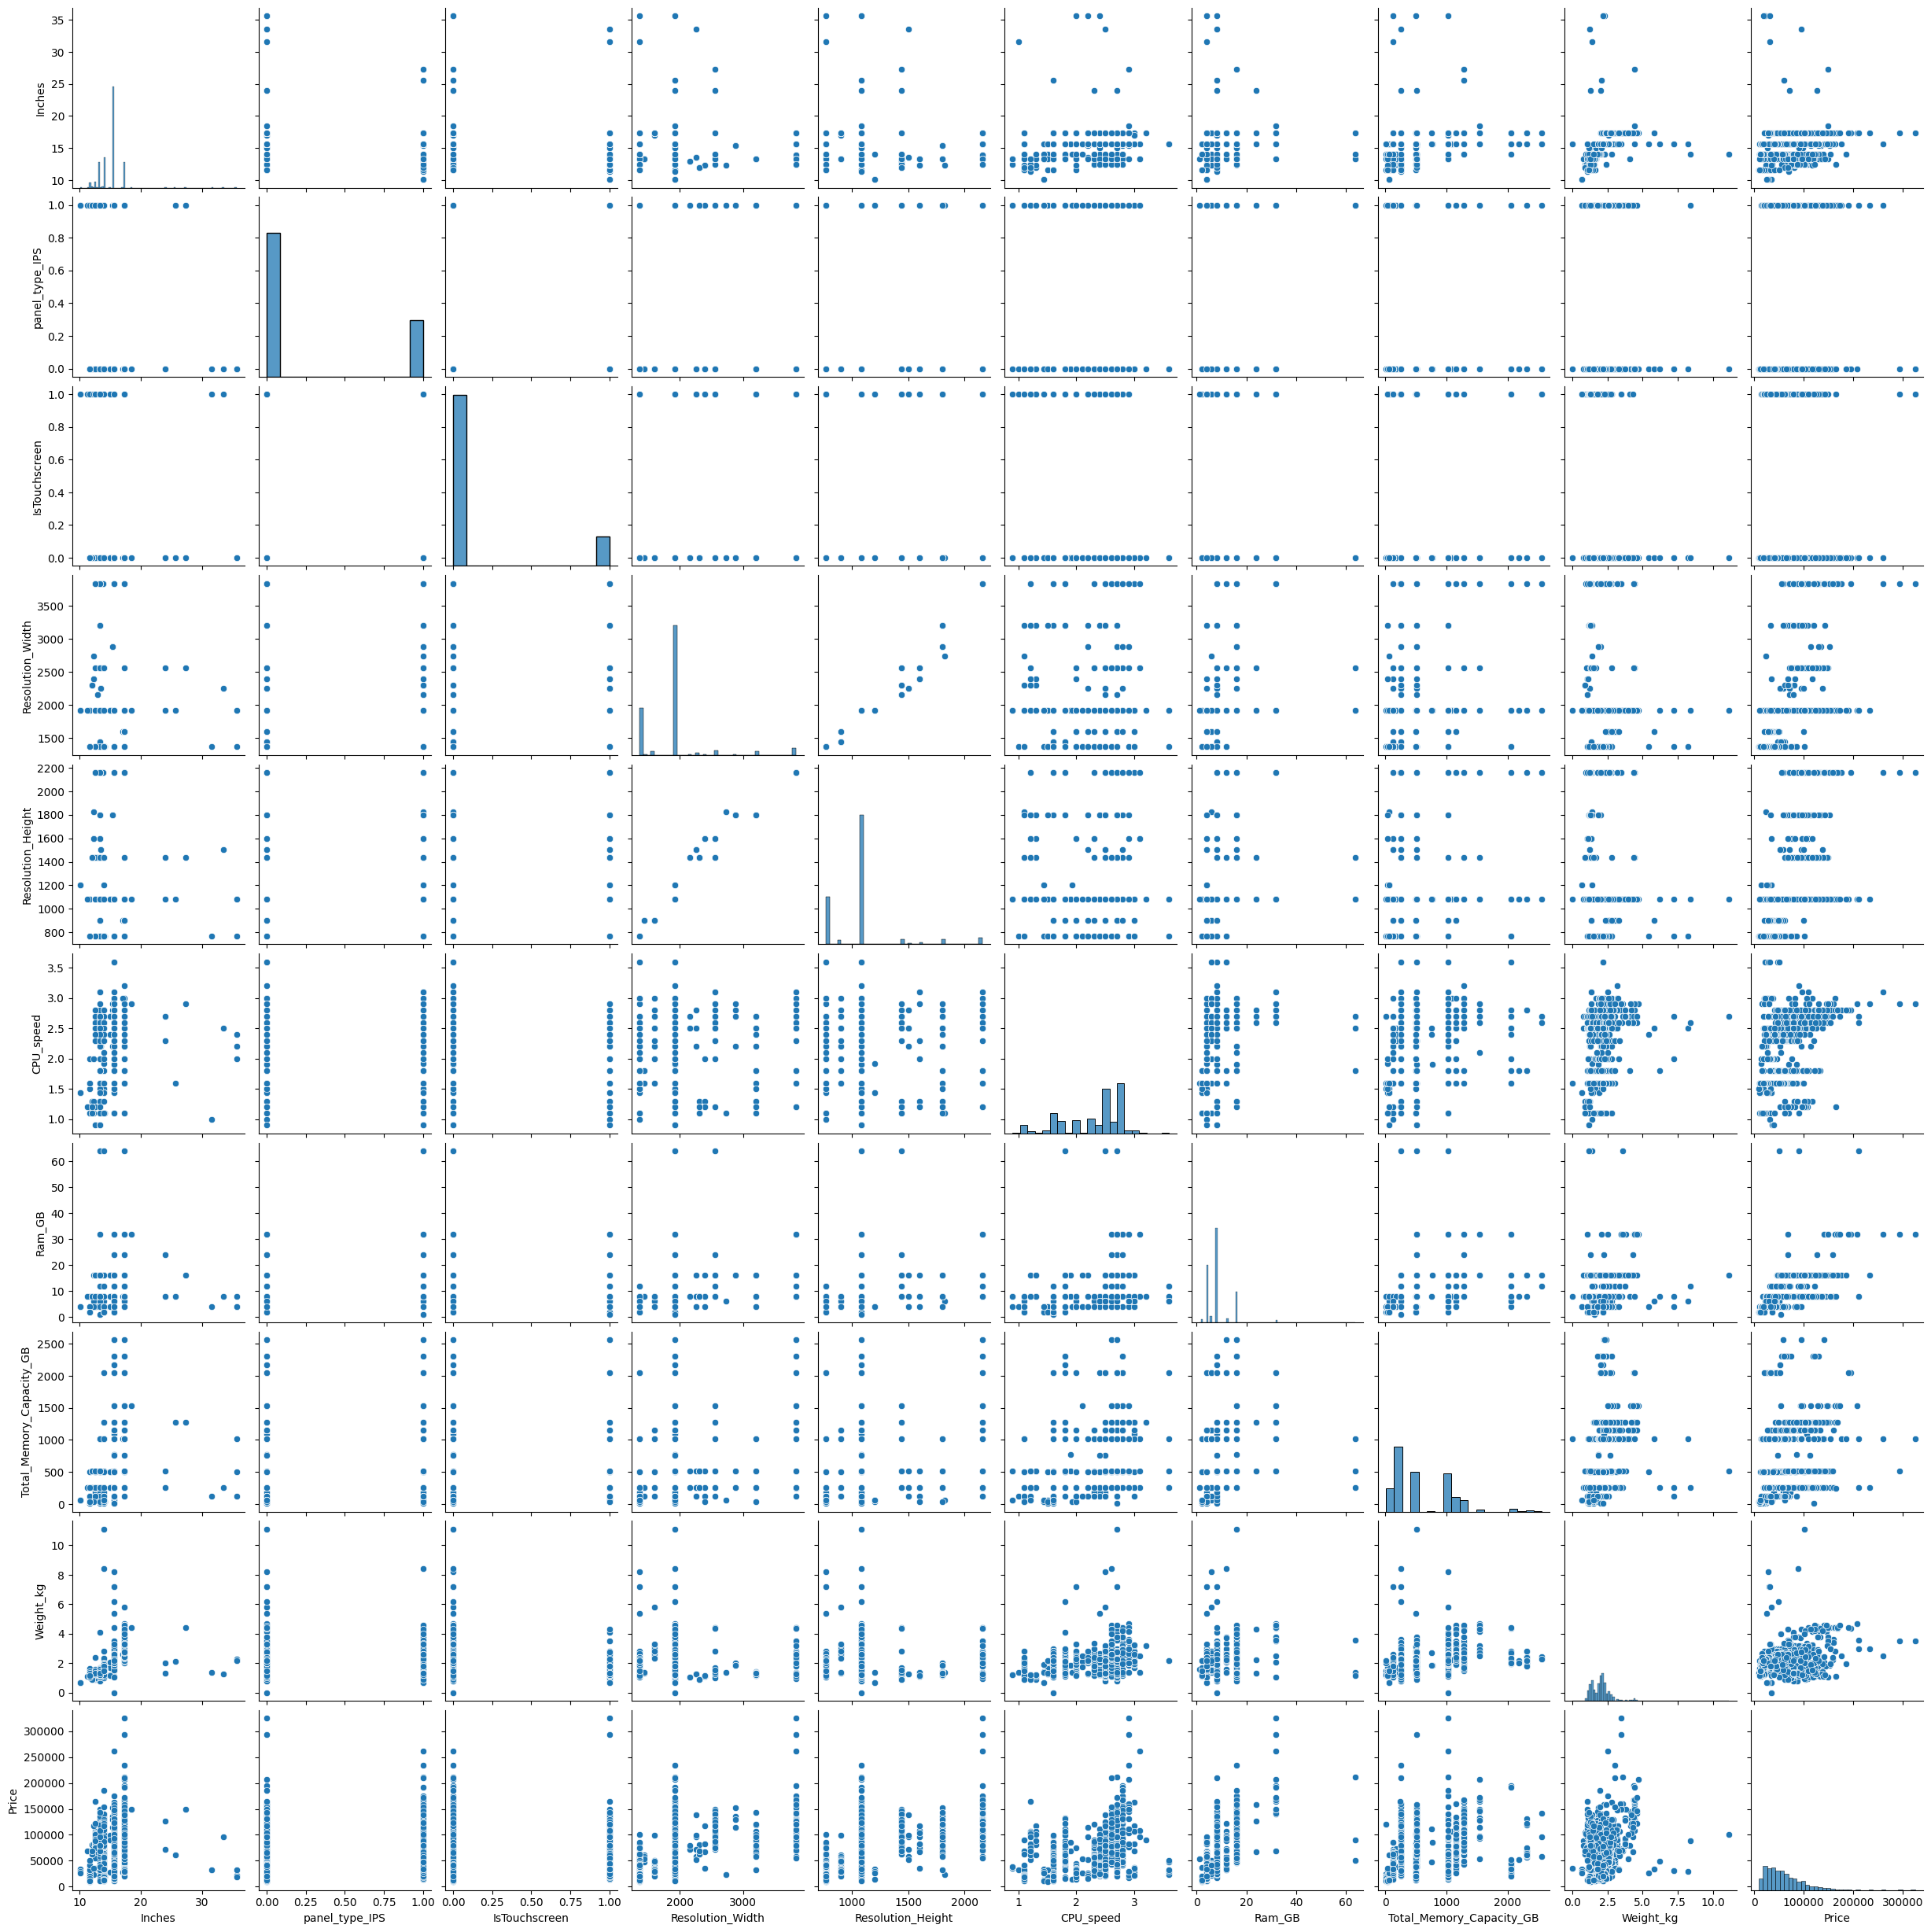

In [54]:
sns.pairplot(Cleaned_Dataset)

## Relationship between company name and price of the laptop

In [40]:
Companis = Cleaned_Dataset["Company"].unique()
print (f"Number of company: {len(Companis)} \n {Companis}")

print ("==============================================")

print ("The relation between company name and Price: \n")
companies_relation = Cleaned_Dataset.groupby("Company")["Price"].mean().sort_values(ascending=False)
companies_relation

Number of company: 19 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
The relation between company name and Price: 



Company
Razer        178282.491429
LG           111834.720000
MSI           91814.548891
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       66747.370213
Dell          63237.061079
Xiaomi        60390.882000
Asus          58972.373723
Lenovo        58072.477208
HP            57214.371465
Fujitsu       38574.720000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

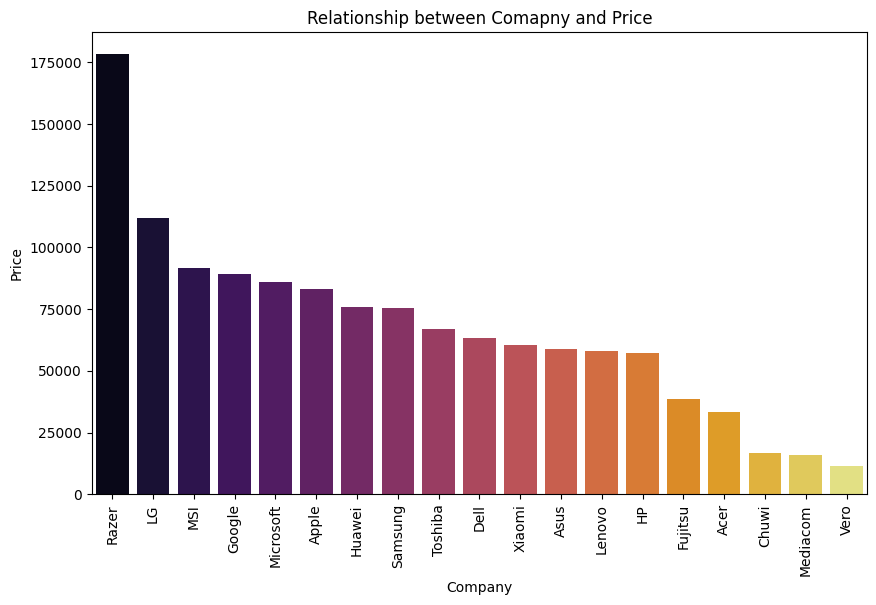

In [41]:

plt.figure(figsize=(10,6))
sns.barplot(
    x=companies_relation.index,
    y=companies_relation.values,
    hue=companies_relation.index,  # Required for palette
    palette='inferno',
    dodge=False,  # Avoid grouped bars
    legend=False   # Hide legend if redundant
)
plt.xlabel("Company")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.title("Relationship between Comapny and Price")
plt.show()

## Relationship Between TypeName and Price

In [42]:
type_names = raw_data["TypeName"].unique()
print (*type_names, sep=', ')

Ultrabook, Notebook, Gaming, 2 in 1 Convertible, Workstation, Netbook
